In [1]:
import sys, os
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir)))

import numpy as np
import librosa
import scipy.signal as sig
import librosa.display
import matplotlib.pyplot as plt

import dsp
from read_labels import read_labels

plt.rcParams['figure.figsize'] = (32, 32)

%matplotlib inline

In [2]:
rootdir = '/home/tracek/Data/Birdman/'
filename = os.path.join(rootdir, 'raw/STHELENA-02_20140605_200000_1.wav')
outdir = os.path.join(rootdir, 'raw/samples/')
filename_noext = os.path.splitext(os.path.basename(filename))[0] 
sheet = read_labels('/home/tracek/Data/Birdman/labels/sthelena_labels.xls', sheetname=filename_noext)

# in seconds [s]
signal_start_s = 0
signal_end_s = 95

sr = 16000
win = 256 # samples
hop = win // 2

condition = (sheet['Time Start'] > signal_start_s) & (sheet['Time End'] < signal_end_s)
sheet_sample = sheet[condition]

In [3]:
y, sr = librosa.load(filename, sr=sr, dtype='float64')
y = y[signal_start_s * sr: signal_end_s * sr]

In [4]:
import yaafelib

feature_plan = yaafelib.FeaturePlan(sample_rate=sr)
success = feature_plan.loadFeaturePlan('features.config')
engine = yaafelib.Engine()
engine.load(feature_plan.getDataFlow())
afp = yaafelib.AudioFileProcessor()
afp.processFile(engine, filename)
feats = engine.readAllOutputs()

In [5]:
C = np.flipud(np.log10(feats['CQT'][:1500].T))

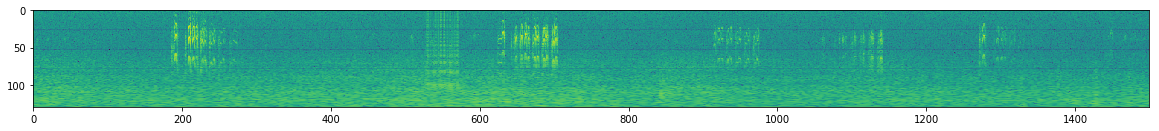

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(C)

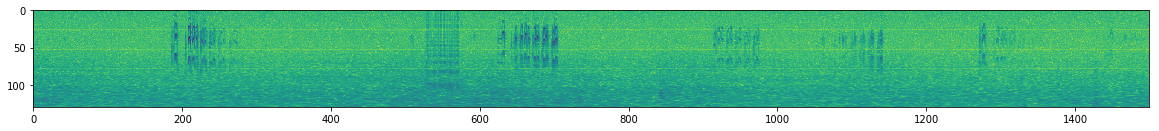

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(librosa.core.logamplitude(C))

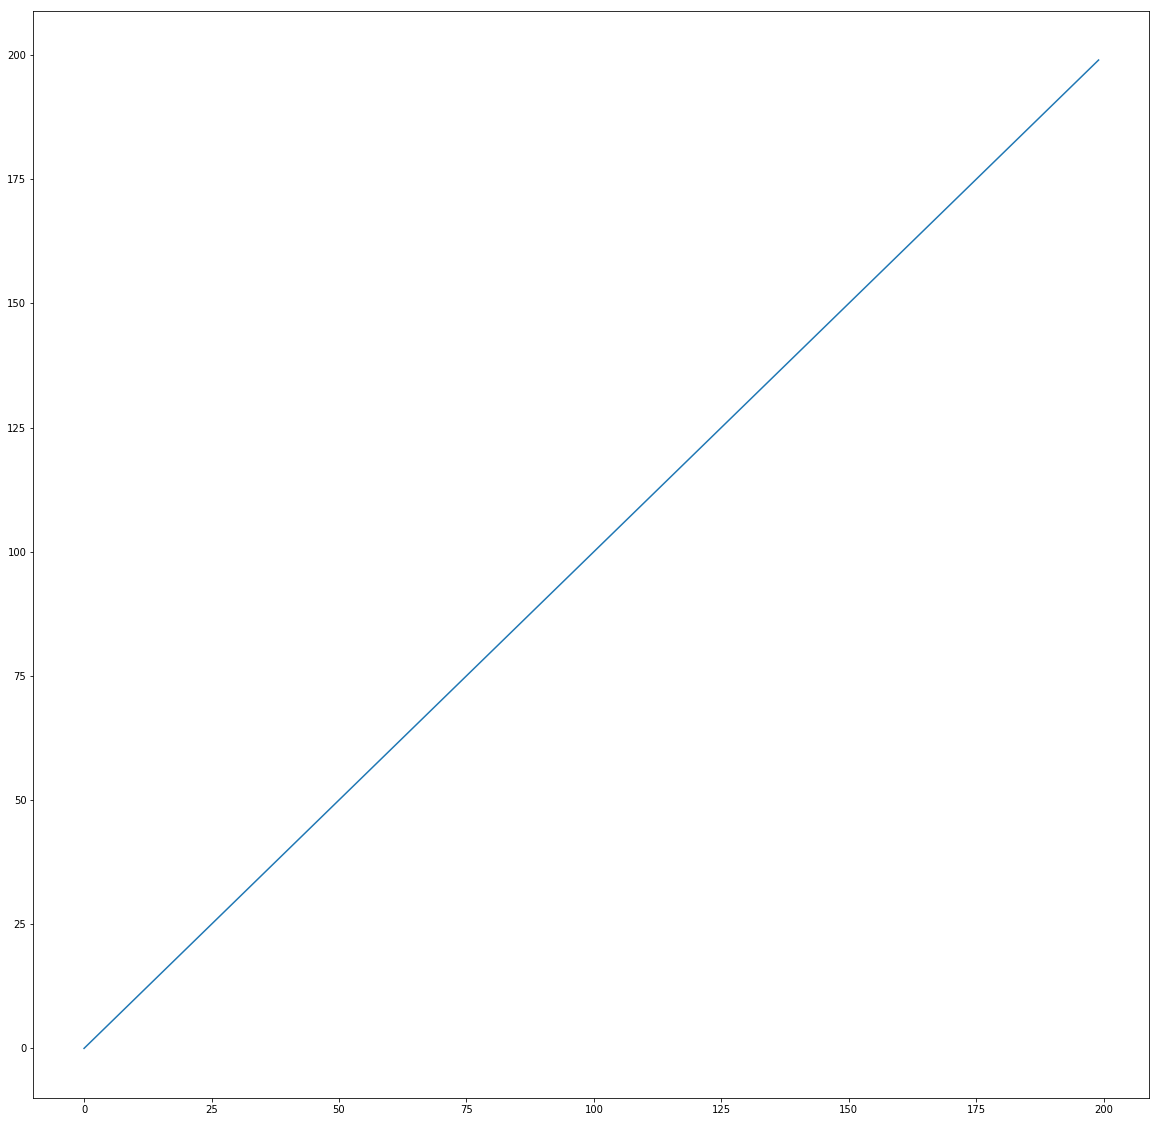

In [10]:
plt.figure(figsize=(20,20))
plt.plot(range(200))